# Lab-3 
**NAME: SRINATH M KRISHNAN | NET ID: SMK220008**


## Preparation

Use dataset that is provided in the eLearning

In [5]:
import pandas as pd
pd.set_option('display.max_columns', 1500)

import warnings
warnings.filterwarnings('ignore')

#Extend cell width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [7]:
"""
Created on Mon Mar 18 18:25:50 2019

@author: Uri Smashnov

Purpose: Analyze input Pandas DataFrame and return stats per column
Details: The function calculates levels for categorical variables and allows to analyze summarized information

To view wide table set following Pandas options:
pd.set_option('display.width', 1000)
pd.set_option('max_colwidth',200)
"""
import pandas as pd
def describe_more(df,normalize_ind=False, weight_column=None, skip_columns=[], dropna=True):
    var = [] ; l = [] ; t = []; unq =[]; min_l = []; max_l = [];
    assert isinstance(skip_columns, list), "Argument skip_columns should be list"
    if weight_column is not None:
        if weight_column not in list(df.columns):
            raise AssertionError('weight_column is not a valid column name in the input DataFrame')
      
    for x in df:
        if x in skip_columns:
            pass
        else:
            var.append( x )
            uniq_counts = len(pd.value_counts(df[x],dropna=dropna))
            uniq_counts = len(pd.value_counts(df[x], dropna=dropna)[pd.value_counts(df[x],dropna=dropna)>0])
            l.append(uniq_counts)
            t.append( df[ x ].dtypes )
            min_l.append(df[x].apply(str).str.len().min())
            max_l.append(df[x].apply(str).str.len().max())
            if weight_column is not None and x not in skip_columns:
                df2 = df.groupby(x).agg({weight_column: 'sum'}).sort_values(weight_column, ascending=False)
                df2['authtrans_vts_cnt']=((df2[weight_column])/df2[weight_column].sum()).round(2)
                unq.append(df2.head(n=100).to_dict()[weight_column])
            else:
                df_cat_d = df[x].value_counts(normalize=normalize_ind,dropna=dropna).round(decimals=2)
                df_cat_d = df_cat_d[df_cat_d>0]
                #unq.append(df[x].value_counts().iloc[0:100].to_dict())
                unq.append(df_cat_d.iloc[0:100].to_dict())
            
    levels = pd.DataFrame( { 'A_Variable' : var , 'Levels' : l , 'Datatype' : t ,
                             'Min Length' : min_l,
                             'Max Length': max_l,
                             'Level_Values' : unq} )
    #levels.sort_values( by = 'Levels' , inplace = True )
    return levels

### Load data

In [119]:
#train_df = pd.read_csv('./data/SBA_loans_small.zip')
X_train = pd.read_csv('SBA_loans_train.csv')
X_test  = pd.read_csv('SBA_loans_test.csv')
orig_columns = list(X_train.columns)

In [11]:
print(orig_columns)

['City', 'State', 'Zip', 'Bank', 'BankState', 'NAICS', 'Term', 'NoEmp', 'NewExist', 'CreateJob', 'RetainedJob', 'FranchiseCode', 'UrbanRural', 'RevLineCr', 'LowDoc', 'DisbursementGross', 'BalanceGross', 'GrAppv', 'SBA_Appv', 'Defaulted']


In [13]:
print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (337186, 20)
Test shape: (112396, 20)


**Review dataset**

In [ ]:
desc_df = describe_more(X_train)
desc_df

,A_Variable,Levels,Datatype,Min Length,Max Length,Level_Values
0,City,22069,object,1,30,"{'LOS ANGELES': 4278, 'HOUSTON': 3801, 'NEW YO..."
1,State,51,object,2,3,"{'CA': 49031, 'TX': 26500, 'NY': 21508, 'FL': ..."
2,Zip,26044,int64,1,5,"{90015: 344, 10001: 328, 93401: 308, 33166: 26..."
3,Bank,4833,object,3,30,"{'BANK OF AMERICA NATL ASSOC': 32382, 'WELLS F..."
4,BankState,55,object,2,3,"{'CA': 44497, 'NC': 29717, 'IL': 24674, 'OH': ..."
5,NAICS,1279,int64,1,6,"{0: 75763, 722110: 10456, 722211: 7319, 811111..."
6,Term,372,int64,1,3,"{84: 86087, 60: 33770, 240: 32245, 120: 29056,..."
7,NoEmp,433,int64,1,4,"{1: 57553, 2: 51865, 3: 34228, 4: 27633, 5: 22..."
8,NewExist,3,float64,3,3,"{1.0: 241894, 2.0: 94857, 0.0: 389}"
9,CreateJob,180,int64,1,4,"{0: 236015, 1: 23537, 2: 21779, 3: 10849, 4: 7..."


In [23]:
X_train.describe()

,Zip,NAICS,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,DisbursementGross,BalanceGross,GrAppv,SBA_Appv,Defaulted
count,337186.000000,337186.000000,337186.000000,337186.000000,337140.000000,337186.000000,337186.000000,337186.000000,337186.000000,3.371860e+05,337186.000000,3.371860e+05,3.371860e+05,337186.000000
mean,53839.723945,398565.095974,110.888984,11.310229,1.280204,8.590790,10.977176,2754.662685,0.758050,2.021301e+05,5.643016,1.935411e+05,1.501295e+05,0.175191
std,31173.277974,263305.463724,78.951681,68.753263,0.451661,239.591219,240.184246,12749.672453,0.646786,2.892966e+05,2232.801967,2.847135e+05,2.293072e+05,0.380131
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000e+02,1.000000e+02,0.000000
25%,27604.250000,235210.000000,60.000000,2.000000,1.000000,0.000000,0.000000,1.000000,0.000000,4.201250e+04,0.000000,3.500000e+04,2.125000e+04,0.000000
50%,55414.000000,445310.000000,84.000000,4.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000e+05,0.000000,9.000000e+04,6.210000e+04,0.000000
75%,83706.000000,561730.000000,120.000000,10.000000,2.000000,1.000000,4.000000,1.000000,1.000000,2.400000e+05,0.000000,2.270000e+05,1.750000e+05,0.000000
max,99999.000000,928120.000000,505.000000,9999.000000,2.000000,8800.000000,9500.000000,99999.000000,2.000000,1.100000e+07,996262.000000,5.000000e+06,4.869000e+06,1.000000


In [24]:
X_train.head()

,City,State,Zip,Bank,BankState,NAICS,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementGross,BalanceGross,GrAppv,SBA_Appv,Defaulted
0,Huntsville,AL,35811,"BUSINESS LOAN CENTER, LLC",FL,621310,73,1,2.0,2,1,0,1,N,N,25000.0,0.0,25000.0,21250.0,1
1,SCOTTSDALE,AZ,85254,WELLS FARGO BANK NATL ASSOC,CA,0,84,3,2.0,0,0,0,0,N,N,52000.0,0.0,52000.0,46800.0,1
2,BANGOR,ME,4401,BANGOR SAVINGS BANK,ME,323110,84,9,1.0,0,0,1,1,0,Y,150000.0,0.0,150000.0,127500.0,0
3,AVONDALE,AZ,85323,NATIONAL BANK OF ARIZONA,AZ,722110,27,20,1.0,0,20,10625,2,Y,N,186959.0,0.0,100000.0,50000.0,1
4,HAMMOND,LA,70403,"BIZCAPITAL BIDCO II, LLC",LA,0,60,1,1.0,0,0,1,1,0,Y,50000.0,0.0,50000.0,40000.0,0


Explore levels and counts in the `RevLineCr` column. As we can see, some column values needs to be "cleaned"

In [30]:
desc_df.iloc[13]["Level_Values"]

{'N': 157494,
 '0': 96923,
 'Y': 75248,
 'T': 5797,
 'R': 7,
 '1': 6,
 '`': 2,
 '2': 1,
 ',': 1,
 '7': 1,
 'A': 1,
 '-': 1,
 'Q': 1}

## Question 1 - 1 point

Replace missing values for all columns for both X_train and X_test.
Replace Na's with zero for numerical variables and with "Missing" for categorical

In [71]:
for col in X_test.columns:
    if X_test[col].isna().any() == True:
        print(col)

City
State
Bank
BankState
NewExist
RevLineCr
LowDoc


In [73]:
for col in X_train.columns:
    if X_train[col].isna().any() == True:
        print(col)

City
State
Bank
BankState
NewExist
RevLineCr
LowDoc


In [121]:
category=['City','State','Bank','BankState','RevLineCr','LowDoc']
numeric=['NewExist']
for i in category:
    X_train[i]=X_train[i].fillna("Missing")
    X_test[i]=X_test[i].fillna("Missing")
for j in numeric:
    X_train[j]=X_train[j].fillna(0)
    X_test[j]=X_test[j].fillna(0)

In [123]:
y_train=X_train['Defaulted']

## Question 2 - 5 points

In this question you are asked to encode categorical variables.   
Because we are going to use Decision Tree approach in the Lab, we will not use One-Hot encoding. Instead, you will utilize  Label encoding, Target encoding and Weight of Evidence encoding.  

For Target encoding and WOE, use `category_encoders` library.
  
Your goal is to determine which approach works better with the given dataset.

Consider following variables to be Categorical:
- "City"  has  22070  values
- "State"  has  52  values
- "Bank"  has  4834  values
- "BankState"  has  56  values
- "RevLineCr"  has  14  values
- "LowDoc"  has  8  values

For the categorical variables listed above, use the three types of categorical variables encoders:  
- Use LabelEncoder from `sklearn.preprocessing` 
- Use Target encoding from here: https://contrib.scikit-learn.org/category_encoders/targetencoder.html 
- Use WOE encoder from here: https://contrib.scikit-learn.org/category_encoders/woe.html 

Take following steps with encoders:
   - Target and WOE:
        - Define encoder
        - Fit encoder on training data only
        - Transform Train/test datasets separately
   - Label Encoder:
        - Fit Label encoder on the combination of train/test data or modify logic of Label encoder to handle unseen valid values
        - If you decide to fit the encoder on Training data only, make sure you have treatment for unseen values: values that present in Test dataset but not in Train dataset
        - Transform Train/test datasets separately

For each encoder, give new column names "Original-name"_le (for Label encoder), "Original-name"_te for target-encoder and "Original-name"_woe for WOE encoder. After encoding, your train/test dataframes will have all the original columns, plus new columns with encoded values.

You should save fitted encoders (Label, TE and WOE) in the Python dictionary named `cat_encoders`.
The key in the `cat_encoders` will be Python set with (column-name, encoder-type). For example, `("City","le")`
Saved encoders will be handy when you try to score trained model on unseen data that has to be transformed before scoring.

In [85]:
from sklearn.preprocessing import LabelEncoder
from category_encoders import TargetEncoder, WOEEncoder

# Initialize dictionary to save encoders
cat_encoders = {}

# List of categorical variables
categorical_vars = ["City", "State", "Bank", "BankState", "RevLineCr", "LowDoc"]

# For each categorical variable
for var in categorical_vars:
    # Label Encoding
    le = LabelEncoder()
    le.fit(X_train[var].append(X_test[var]))  # Or fit only on train
    X_train[f"{var}_le"] = le.transform(X_train[var])
    X_test[f"{var}_le"] = le.transform(X_test[var].map(lambda s: 'Missing' if s not in le.classes_ else s))  # Handling unseen values
    cat_encoders[(var, "le")] = le

    # Target Encoding
    te = TargetEncoder()
    te.fit(X_train[var], X_train['Defaulted'])  # Assuming 'target' is the target variable
    X_train[f"{var}_te"] = te.transform(X_train[var])
    X_test[f"{var}_te"] = te.transform(X_test[var])
    cat_encoders[(var, "te")] = te

    # WOE Encoding
    woe = WOEEncoder()
    woe.fit(X_train[var], X_train['Defaulted'])  # Assuming 'target' is the target variable
    X_train[f"{var}_woe"] = woe.transform(X_train[var])
    X_test[f"{var}_woe"] = woe.transform(X_test[var])
    cat_encoders[(var, "woe")] = woe



In [87]:
X_train.head()

,City,State,Zip,Bank,BankState,NAICS,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementGross,BalanceGross,GrAppv,SBA_Appv,Defaulted,City_le,City_te,City_woe,State_le,State_te,State_woe,Bank_le,Bank_te,Bank_woe,BankState_le,BankState_te,BankState_woe,RevLineCr_le,RevLineCr_te,RevLineCr_woe,LowDoc_le,LowDoc_te,LowDoc_woe
0,Huntsville,AL,35811,"BUSINESS LOAN CENTER, LLC",FL,621310,73,1,2.0,2,1,0,1,N,N,25000.0,0.0,25000.0,21250.0,1,10027,0.283212,1.107415,1,0.167744,-0.050917,803,0.308181,0.741374,11,0.158105,-0.122172,9,0.146342,-0.214300,4,0.186457,0.076065
1,SCOTTSDALE,AZ,85254,WELLS FARGO BANK NATL ASSOC,CA,0,84,3,2.0,0,0,0,0,N,N,52000.0,0.0,52000.0,46800.0,1,19482,0.191919,0.118312,3,0.200634,0.167471,4997,0.138341,-0.279641,5,0.221678,0.293405,9,0.146342,-0.214300,4,0.186457,0.076065
2,BANGOR,ME,4401,BANGOR SAVINGS BANK,ME,323110,84,9,1.0,0,0,1,1,0,Y,150000.0,0.0,150000.0,127500.0,0,1058,0.125985,-0.336038,21,0.096586,-0.682359,381,0.062502,-1.049319,23,0.076696,-0.930088,2,0.149252,-0.191171,7,0.090740,-0.755151
3,AVONDALE,AZ,85323,NATIONAL BANK OF ARIZONA,AZ,722110,27,20,1.0,0,20,10625,2,Y,N,186959.0,0.0,100000.0,50000.0,1,740,0.351182,1.063740,3,0.200634,0.167471,3292,0.059406,-1.162305,4,0.068197,-1.056343,13,0.253136,0.467327,4,0.186457,0.076065
4,HAMMOND,LA,70403,"BIZCAPITAL BIDCO II, LLC",LA,0,60,1,1.0,0,0,1,1,0,Y,50000.0,0.0,50000.0,40000.0,0,8869,0.275805,0.622485,18,0.179574,0.031247,708,0.362410,1.072323,20,0.101741,-0.624053,2,0.149252,-0.191171,7,0.090740,-0.755151


## Question 3 - 5 points

Train one model for every type of categorical encoding: Label, Target and WOE :
```
max_depth = 10

dtc = DecisionTreeClassifier(random_state=0, 
                             criterion="entropy",
                             max_depth=max_depth)

```

Report F1, and confusion matrix for each of the 3 models.  
Use F1 score "weighted" : https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html 

In [99]:
X_train_te=X_train[["City_te","State_te","Bank_te", "BankState_te", "RevLineCr_te", "LowDoc_te"]]
X_train_le=X_train[["City_le","State_le","Bank_le", "BankState_le", "RevLineCr_le", "LowDoc_le"]]
X_train_woe=X_train[["City_woe","State_woe","Bank_woe", "BankState_woe", "RevLineCr_woe", "LowDoc_woe"]]

X_test_te=X_test[["City_te","State_te","Bank_te", "BankState_te", "RevLineCr_te", "LowDoc_te"]]
X_test_le=X_test[["City_le","State_le","Bank_le", "BankState_le", "RevLineCr_le", "LowDoc_le"]]
X_test_woe=X_test[["City_woe","State_woe","Bank_woe", "BankState_woe", "RevLineCr_woe", "LowDoc_woe"]]

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, confusion_matrix

max_depth = 10
dtc_le = DecisionTreeClassifier(random_state=0, criterion="entropy", max_depth=max_depth)
dtc_te = DecisionTreeClassifier(random_state=0, criterion="entropy", max_depth=max_depth)
dtc_woe = DecisionTreeClassifier(random_state=0, criterion="entropy", max_depth=max_depth)

# Assuming 'X_train' and 'y_train' are your features and target variables for training
# and 'X_test' and 'y_test' are for testing. Replace them with actual variable names.

# Train with Label Encoding
dtc_le.fit(X_train_le, X_train['Defaulted'])
predictions_le = dtc_le.predict(X_test_le)

# Train with Target Encoding
dtc_te.fit(X_train_te, X_train['Defaulted'])
predictions_te = dtc_te.predict(X_test_te)

# Train with WOE Encoding
dtc_woe.fit(X_train_woe, X_train['Defaulted'])
predictions_woe = dtc_woe.predict(X_test_woe)


In [152]:
from sklearn.metrics import f1_score, confusion_matrix,ConfusionMatrixDisplay

Label Encoding - F1 Score: 0.8028015223417931 Confusion Matrix: [[90503  2186]
 [15828  3879]]


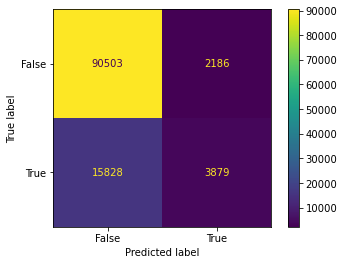

Target Encoding - F1 Score: 0.8026757602755061 Confusion Matrix: [[89348  3341]
 [15326  4381]]


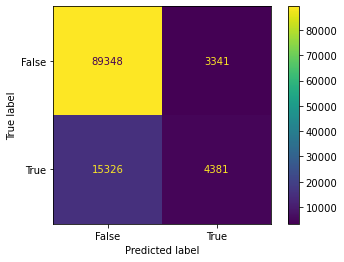

WOE Encoding - F1 Score: 0.7991992253680227 Confusion Matrix: [[90380  2309]
 [16010  3697]]


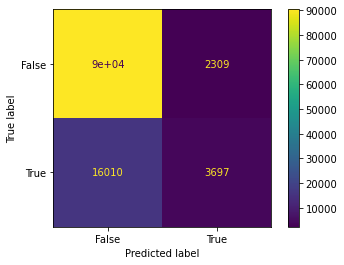

In [160]:
f1_le = f1_score(X_test['Defaulted'], predictions_le, average='weighted')
cm_le = confusion_matrix(X_test['Defaulted'], predictions_le)

# F1 Score and Confusion Matrix for Target Encoding
f1_te = f1_score(X_test['Defaulted'], predictions_te, average='weighted')
cm_te = confusion_matrix(X_test['Defaulted'], predictions_te)

# F1 Score and Confusion Matrix for WOE Encoding
f1_woe = f1_score(X_test['Defaulted'], predictions_woe, average='weighted')
cm_woe = confusion_matrix(X_test['Defaulted'], predictions_woe)

# Print results
print("Label Encoding - F1 Score:", f1_le, "Confusion Matrix:", cm_le)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm_le, display_labels = [False, True])
cm_display.plot()
plt.show()
print("Target Encoding - F1 Score:", f1_te, "Confusion Matrix:", cm_te)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm_te, display_labels = [False, True])
cm_display.plot()
plt.show()
print("WOE Encoding - F1 Score:", f1_woe, "Confusion Matrix:", cm_woe)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm_woe, display_labels = [False, True])
cm_display.plot()
plt.show()

## Question 4 - 5 points

To answer this question use categorical columns encoded with Target encoder.

You will split Train dataset using 80/20 split to Train/Validation. 
Use new Train dataset to fit the model.
Use Validation dataset to evaluate the model and identify best model.

Tune Decision Tree model to identify hyper-parameters that lead to best performance as measured by F1 score ("weighted") on the Validation dataset.

Here is Hyper parameter space:  
   - max_depth = [5,10,12,15,20]  
   - min_samples_split = [25, 50, 75]  
   - min_impurity_decrease = [0.0, 0.02, 0.05]  
    
You should train 5x3x3 = 45 models

From the above 45 models, identify best model as measured by F1 score on Validation dataset.  
For the Best model:
- Report set of hyper parameters used to train the model.  
- Report F1 and confusion matrix on **Validation** dataset.  
- Report F1 and confusion matrix on **Test** dataset.


In [105]:
from sklearn.model_selection import train_test_split

# Assuming 'X_te' and 'y_te' are your feature and target variables from Target Encoding
X_train, X_val, y_train, y_val = train_test_split(X_train_te, X_train['Defaulted'], test_size=0.2, random_state=0)
max_depths = [5, 10, 12, 15, 20]
min_samples_splits = [25, 50, 75]
min_impurity_decreases = [0.0, 0.02, 0.05]


from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, confusion_matrix

best_f1_score = 0
best_model = None
best_params = {}

for depth in max_depths:
    for min_samples in min_samples_splits:
        for impurity_decrease in min_impurity_decreases:
            # Initialize and train the model
            dtc = DecisionTreeClassifier(max_depth=depth, min_samples_split=min_samples, min_impurity_decrease=impurity_decrease, random_state=0)
            dtc.fit(X_train, y_train)

            # Make predictions and evaluate
            val_predictions = dtc.predict(X_val)
            val_f1 = f1_score(y_val, val_predictions, average='weighted')

            # Update best model if current model is better
            if val_f1 > best_f1_score:
                best_f1_score = val_f1
                best_model = dtc
                best_params = {'max_depth': depth, 'min_samples_split': min_samples, 'min_impurity_decrease': impurity_decrease}



Best Model Parameters: {'max_depth': 20, 'min_samples_split': 75, 'min_impurity_decrease': 0.0}
F1 Score on Validation Dataset: 0.8217706248945114
Confusion Matrix on Validation Dataset:
 [[53235  2355]
 [ 8200  3648]]


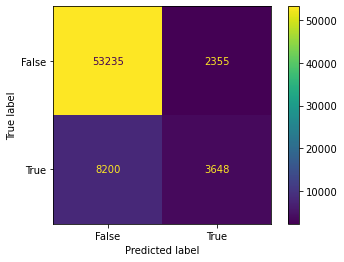

In [154]:
# Validation dataset
val_predictions_best = best_model.predict(X_val)
f1_val = f1_score(y_val, val_predictions_best, average='weighted')
cm_val = confusion_matrix(y_val, val_predictions_best)

print("Best Model Parameters:", best_params)
print("F1 Score on Validation Dataset:", f1_val)
print("Confusion Matrix on Validation Dataset:\n", cm_val)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm_val, display_labels = [False, True])
cm_display.plot()
plt.show()

F1 Score on Test Dataset: 0.8068273835950467
Confusion Matrix on Test Dataset:
 [[88387  4302]
 [14577  5130]]


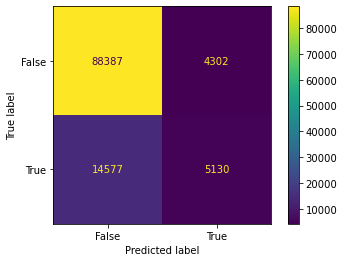

In [158]:
# Assuming 'X_test_te' and 'y_test_te' are your test datasets
test_predictions_best = best_model.predict(X_test_te)
f1_test = f1_score(X_test['Defaulted'], test_predictions_best, average='weighted')
cm_test = confusion_matrix(X_test['Defaulted'], test_predictions_best)

print("F1 Score on Test Dataset:", f1_test)
print("Confusion Matrix on Test Dataset:\n", cm_test)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm_test, display_labels = [False, True])
cm_display.plot()
plt.show()

## Question 5 - 1 point

Retrain the model with best params you have identified in Question 4 on full Training dataset.
Evaluate model performance on Test dataset.

In [125]:
# Initialize the Decision Tree Classifier with best parameters
best_dtc = DecisionTreeClassifier(max_depth=best_params['max_depth'], 
                                  min_samples_split=best_params['min_samples_split'], 
                                  min_impurity_decrease=best_params['min_impurity_decrease'], 
                                  random_state=0)

# Retrain on the full training dataset
X_train['Defaulted']
best_dtc.fit(X_train_te, y_train)


DecisionTreeClassifier(max_depth=20, min_samples_split=75, random_state=0)

F1 Score on Test Dataset: 0.806171355201435
Confusion Matrix on Test Dataset:
 [[88312  4377]
 [14588  5119]]


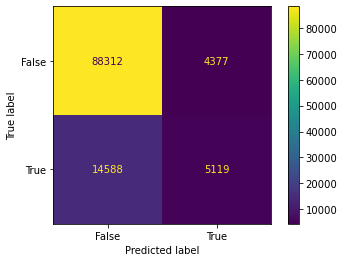

In [156]:


# Make predictions on the test dataset
test_predictions = best_dtc.predict(X_test_te)

# Calculate F1 score and Confusion Matrix
f1_test = f1_score(X_test['Defaulted'], test_predictions, average='weighted')
cm_test = confusion_matrix(X_test['Defaulted'], test_predictions)

# Print the performance metrics
print("F1 Score on Test Dataset:", f1_test)
print("Confusion Matrix on Test Dataset:\n", cm_test)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm_test, display_labels = [False, True])
cm_display.plot()
plt.show()

## Question 6 - 3 Points

Produce visualization of the best model feature importance's.
Calculate feature importance using permutation method.

In [129]:
from sklearn.inspection import permutation_importance
import numpy as np

# Calculate permutation importances on the test set
perm_importance = permutation_importance(best_dtc, X_test_te, X_test['Defaulted'], n_repeats=30, random_state=0)

# Get the mean importances and standard deviations
importances_mean = perm_importance.importances_mean
importances_std = perm_importance.importances_std

# Feature names
feature_names = X_test_te.columns


In [131]:
feature_names = X_test_te.columns

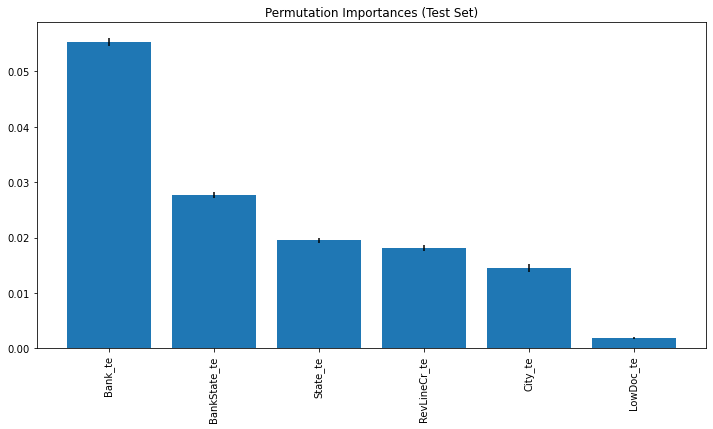

In [138]:
import matplotlib.pyplot as plt

# Sort the feature importances in descending order and get their indices
sorted_idx = np.argsort(importances_mean)[::-1]

# Create a bar chart
plt.figure(figsize=(12, 6))
plt.bar(range(len(sorted_idx)), importances_mean[sorted_idx], yerr=importances_std[sorted_idx], align='center')
plt.xticks(range(len(sorted_idx)), feature_names[sorted_idx], rotation=90)
plt.title('Permutation Importances (Test Set)')
plt.show()